### Introduction to Regression with Neural Networks in TensorFlow

there are many defintions for a regression problem.

In [4]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

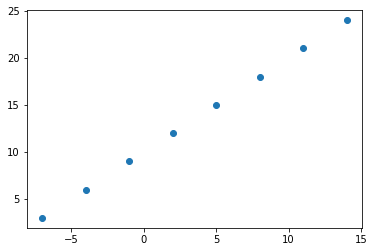

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(x,y)

In [8]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Imput and output shapes

In [9]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
hose_price = tf.constant([939700])
house_info,hose_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [10]:
input_shape = x.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [ ]:
x[1],y[1]

(-4.0, 6.0)

In [ ]:
x[0],y[0]

(-7.0, 3.0)

In [ ]:
x[0].ndim

0

In [11]:
# Turn our Numpy arrays into tensors with dtype of float 32
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

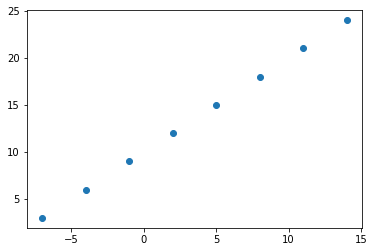

In [13]:
plt.scatter(x,y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as weel as the hidden layers of a deep learning model.
2. **Compiling a model** define the loss function.
3. **Fitting a model**

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 501ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [15]:
# Check out x and y
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [17]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** here we might add more layers, increase the number of hidden units.
2. **Compiling a model** here we might change the optimization functions or perhaps the **learning rate** of the optimization function.
3. **Fitiing a model** here we might fit a model for **epochs** 

In [18]:
# Create a model 
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics =["mae"])

# Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 274ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [19]:
# Remind ourselves of the data
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Let's see if our model prediction has improved..
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [21]:
# Let' see if we can make another to improve our model

# 1. Create the model with another label of 100
model = tf.keras.Sequential([
        tf.keras.layers.Dense(70,activation = None),
        tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics = ["mae"])
# Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 382ms/step - loss: 12.0678 - mae: 12.0678
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2674 - mae: 11.2674
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4575 - mae: 10.4575
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 9.6340 - mae: 9.6340
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7908 - mae: 8.7908
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.9223 - mae: 7.9223
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.0237 - mae: 7.0237
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9789 - mae: 6.9789
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3441 - mae: 7.3441
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5907 - mae: 7.5907
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6683 -

In [ ]:
model.predict([17.0])

array([[26.671696]], dtype=float32)

### Evaluating the model

In [22]:
# Make a bigger dataset
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# make labels for the dataset
y = x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

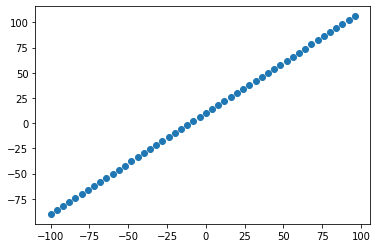

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

### the 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of data available.
* **test set** - the model gets evaluated on this data to test what is has learned,this set is typically 10-15% of the total data available.


In [130]:
# Check the length how many samples we have
len(x)

50

In [61]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples(80% of the data)
y_train = y[:40] # first 40 are training samples(80% of the data)

x_test = x[40:] # last 10 are testing examples(10% of the data
y_test = y[40:] # first 10 are training samples(80% of the data)

len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

### Visualizing the data

It's time to visualize it again!

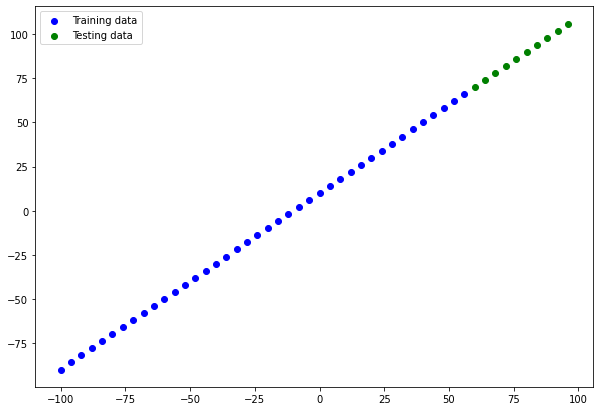

In [62]:
plt.figure(figsize=(10,7))
# Plot the training data in blue
plt.scatter(x_train,y_train,c="b",label="Training data")
# Plot the training data in green
plt.scatter(x_test,y_test,c="g",label="Testing data")
# Show a legend
plt.legend();

In [63]:
# Let's have a look at how to build a neural network

# Create a model 
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics =["mae"])

# Fit the model
#model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)


### Visualizing the model

In [64]:
# Let's crate a model which vuilds automatically by definding the imput shape
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

* Total params - total number of parameters in the model.
* trainable parameteres- these are the parameters(patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training.

**Resources:** for more in-depth , search on google introduction of deep learning in mit.


In [66]:
# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [67]:
# Get a summary of our model
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


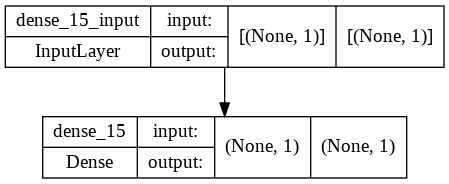

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's good idea to plot them against the ground truth labels.

Ofter you'll see this in the form of 'y_test' vs 'y_pred'

In [69]:
# Make predictions
#y_preds = model.predict(tf.expand_dims(x_test, axis=-1))
y_preds = model.predict(x_test)
y_preds

array([[ 69.33173 ],
       [ 73.781975],
       [ 78.232216],
       [ 82.68246 ],
       [ 87.1327  ],
       [ 91.58294 ],
       [ 96.03318 ],
       [100.48342 ],
       [104.93366 ],
       [109.383896]], dtype=float32)

In [70]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [71]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

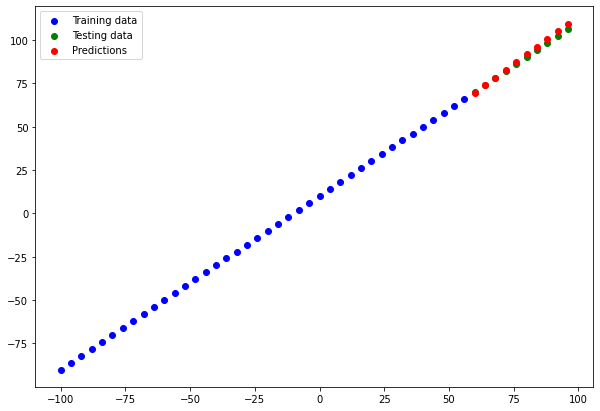

In [72]:
plot_predictions(train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluation our model's predictions with regrestions evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error
* MSE - mean square error
* Huber - combination with MAE & MSE


In [73]:
# Evaluate the model on the test
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 93ms/step - loss: 1.5351 - mae: 1.5351


[1.5350761413574219, 1.5350761413574219]

In [74]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                    y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([75.28398], dtype=float32)>

In [75]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=12.716021>

In [76]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=75.28398>

In [77]:
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5799.678>

In [78]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       tf.squeeze(y_pred))

##Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** get more examples 
for your model to train on (more opportunities to learn patterns).
2. **Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.

In [79]:
x_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [95]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


# Fit the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

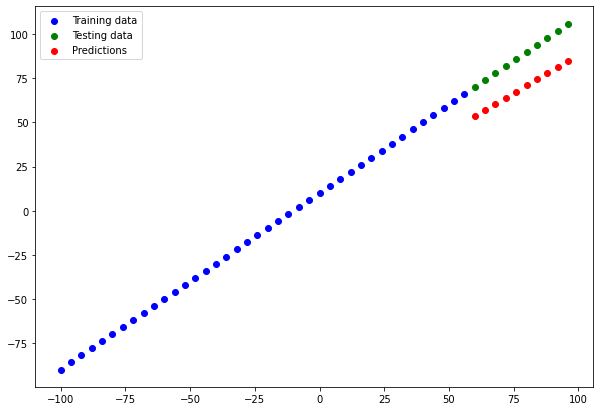

In [96]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [97]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model_2**

In [85]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),                     
          tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


# Fit the model
model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 9

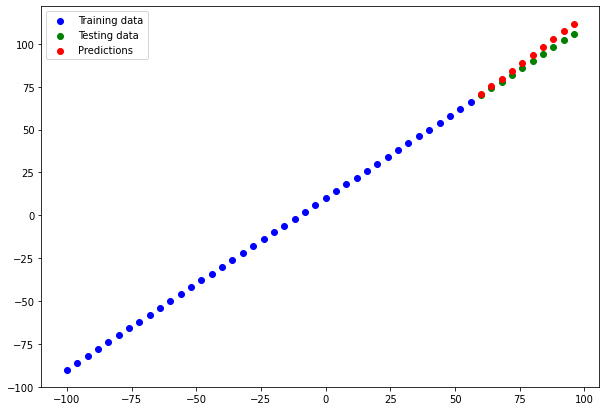

In [86]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [87]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model 3**

In [89]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),                     
          tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


# Fit the model
model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 4ms/

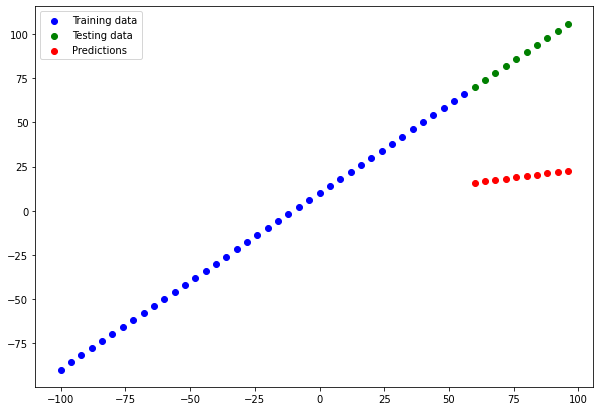

In [90]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [91]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments

In [98]:
# Let's compare out model's result using a pandas Dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mae_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,68.713615


In [94]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource:** But as you build more models, you'll want to look into using tools such as:
* [**TensorBoard**](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* [**Weights & Biases**](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [99]:
# Save model using the SavedModel Format
model_2.save("best_model_SavedModel_Format")

INFO:tensorflow:Assets written to: best_model_SavedModel_Format/assets


In [100]:
# Save model using the HDFS format
model_2.save("best_model_HDFS_Format.h5")

## Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particuluar formats are correct).

In [102]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("/content/best_model_SavedModel_Format")
loaded_saved_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(x_test)
saved_model_preds = loaded_saved_model.predict(x_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [105]:
mae(y_test, saved_model_preds.squeeze()).numpy()

3.1969407

In [106]:
mae(y_test, model_2_preds.squeeze()).numpy()

3.1969407

In [107]:
saved_model_preds.squeeze()

array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)

In [108]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDFS_Format.h5")
loaded_h5_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Check to see if loaded. h5 model predictions match model_2
model_2_preds = model_2.predict(x_test)
loaded_h5_model_predicts = loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_model_predicts

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [112]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("/content/best_model_HDFS_Format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich datase.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

> 🔑 **Note:** When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [2]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
# Check the dataset
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
insurance["smoker"],insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [10]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [13]:
# Create X & y values (features and labels)
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [15]:
# View x
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [16]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [18]:
# Create training test sets
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits


In [21]:
 len(x),len(X_test),len(X_train)

(1338, 268, 1070)

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [28]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [30]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364489)

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [36]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000), # 1000 units
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 12433.4883 - mae: 12433.4883
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 7884.7861 - mae: 7884.7861
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 7362.7944 - mae: 7362.7944
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 7204.8843 - mae: 7204.8843
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 7073.4219 - mae: 7073.4219
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 6916.2515 - mae: 6916.2515
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 6722.6812 - mae: 6722.6812
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 6547.0596 - mae: 6547.0596
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 6468.8755 - mae: 6468.8755
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 6397.8428 - mae: 6397.84

In [37]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3188.5085 - mae: 3188.5085


[3188.508544921875, 3188.508544921875]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

> 🔑 **Note:** For many problems, the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) is a great starting choice. See Andrei Karpathy's "Adam is safe" point from [*A Recipe for Training Neural Networks*](http://karpathy.github.io/2019/04/25/recipe/) for more. 

Let's check out the loss curves of our model, we should see a downward trend.

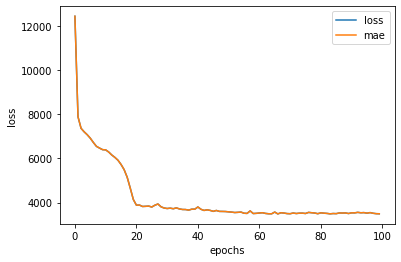

In [38]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> 🤔 **Question:** How long should you train for? 

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [40]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing trnasformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [43]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [47]:
X_train_normal,X_train

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),       age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.35

In [48]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [49]:
# Evaulate the model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3173.7422 - mae: 3173.7422


## 🛠 Exercises

We've a covered a whole lot pretty quickly.

So now it's time to have a **play around** with a few things and start to build up your initution.

I emphasise the words play around because that's very important. Try a few things out, run the code and see what happens.

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


## 📖 Extra curriculum

If you're looking for extra materials relating to this notebook, I'd check out the following:

* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.

To practice your regression modelling with TensorFlow, I'd also encourage you to look through [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) or [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.